#SIMULATION PARCHIS

The context of this project is a digital simulation project that I developed and continued working in after the due date. More details about the ongoing work is mentioned below.

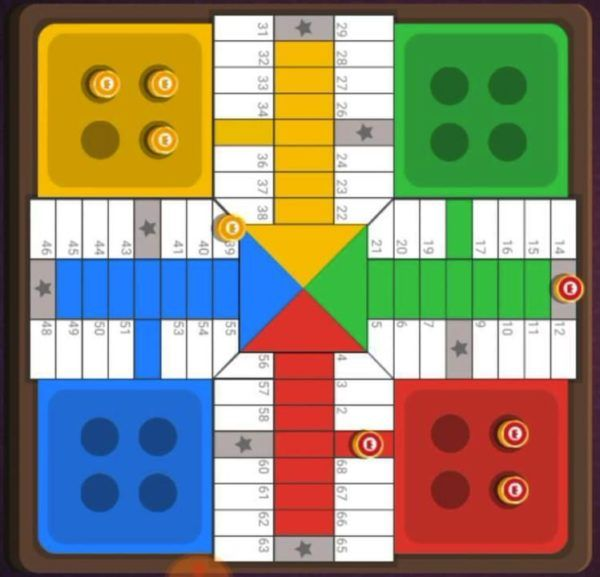

#Objective

The objective of this project is creating a simulator for parchis that allows to change the initial parameters of the game to analyze the probability of victory given certain conditions.

#Development

There are some details to take into account on this simulator and that is that the game rules are a bit complicated and can change depending on who plays, so there are some unmovable bases on the simulation. The game is simple at a first look, but once an hierarchy of movements is implemented lots of complicated cases come up that must be dealt with. The code includes notes mentioning the case that is being solved if there's an obtuse group of lines of code.

Beyond simple rules like, by example, there is no limit for pawns on a single box, the most important details can be described with the priority hierarchy of the moves.



**Getting out of jail > crowning > eating > entering final stretch > any other move**

Based on this, the algorythm will choose some moves over others if the possibility is available. If there is no priority moves available, the move is chosen randomly on the available options.

#Rules clarification

Depending on the version or country or even the group of people playing rules can vary, so there are some important definitions to clarify.

- There is no way to block pawns from advancing.

- When the player gets duplicate dice he obtains an extra turn

- If a player gets duplicate dice three times in a row, a pawn gets crowned.

- There is no limit of pawns in a single box.

- If all the available pawns are in jail, the player gets three chances to get duplicate dice so they can exit.

#Utilized libraries

In [ ]:
import random
import numpy as np

#Initial values

Giving every box a number, except for the safe boxes on the way towards the end, I can define a starting position, ending position, safe spaces and other values for the players.

In [ ]:
Casillas = list(range(1,69))
Seguros = [1, 8, 13, 18, 25, 30, 35, 42, 47, 52, 59, 64]
RojoInit = 1
VerdeInit = 18
AmarilloInit = 35
AzulInit = 52
RojoEnd = 64
VerdeEnd = 13
AmarilloEnd = 30
AzulEnd = 47
RectaFinal = list(range(0,8))
RojoCoronadas = 0
AzulCoronadas = 0
VerdeCoronadas = 0
AmarilloCoronadas = 0
RojoCarcel = 4
AzulCarcel = 4
VerdeCarcel = 4
AmarilloCarcel = 4
print(Casillas)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]


Five dictionaries are created, one for every player and one containing them all. All values defined for the players are inserted here. If another starting case is wanted, it can be defined by changing the values here.

#VALUES MEANING

**Pos_actual:** Position of the pawns on the board

**Pos_tramo_final:** Position of the pawns on the final stretch

**Pos_final:** number of the box that separates the board from the final stretch

**Pos_inicial:** number of the starting box after escaping jail

**Coronadas:** number of crowned pawns

**Encarceladas:** number of pawns in jail

**lapsed:** has the pawn on the board gone around the board already?

all colors except red must go around the 68 box before entering the final stretch, this variable shows if this condition is fulfilled for the pawns (red pawns are always True at their creation)

**Color:** name of the color (in spanish)

In [ ]:
Rojo_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":RojoEnd,"Pos_inicial":RojoInit,"Coronadas":RojoCoronadas,"Encarceladas":RojoCarcel, "lapsed":[], "Color": "Rojo"}
Amarillo_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":AmarilloEnd,"Pos_inicial":AmarilloInit,"Coronadas":AmarilloCoronadas,"Encarceladas":AmarilloCarcel, "lapsed":[], "Color": "Amarillo"}
Verde_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":VerdeEnd,"Pos_inicial":VerdeInit,"Coronadas":VerdeCoronadas,"Encarceladas":VerdeCarcel, "lapsed":[], "Color": "Verde"}
Azul_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":AzulEnd,"Pos_inicial":AzulInit,"Coronadas":AzulCoronadas,"Encarceladas":AzulCarcel, "lapsed":[], "Color": "Azul"}
players_dict = {"Rojo": Rojo_dict, "Amarillo":Amarillo_dict, "Verde":Verde_dict,"Azul":Azul_dict}



In [ ]:
players_dict

#Complementary functions

There is a large function that fulfills the role of a player deciding the moves to play. For it to be possible, some complementary functions have to be made.

In [ ]:
#Defines the possible moves the player can make with the rolled dice.
#Sends back the moves and the pawns that can make them in both the board and the final stretch.
def DefinePositions(elems, posic, finishline, startline, lapses):
  possibleones = []
  lastones = [] #two arrays are created, they contain the moves on the board and the ones that can move into the final stretch.
  finishact = False 
  #This part the dices available. Exists in case a dice was used in crowning
  if len(elems) == 3:
    thesum = elems[0] + elems[1]
  elif len(elems)>0:
    thesum = elems[0]
  if len(elems)> 0: #if there are usable dice
    if len(posic) == 1: #if there is only one pawn on the board (CASE: must use both dice)
      if lapses[0] == False: #if the pawn has not gone around the board 
        if thesum + posic[0] > 68:
          realnowpos = thesum+posic[0]-68 # define new position when reached the limit of the board    
        else:
          realnowpos = thesum + posic[0] #define new position
        possibleones.append([0, realnowpos,posic[0], thesum]) #number on the position array, position it will move to, original position and used dice
      else: # if the pawn has already gone around the board
        realnowpos = thesum + posic[0] #define new position
        if thesum + posic[0] >= finishline: # if it's possible to reach the final stretch
          if (realnowpos - finishline) <= 8:
            finishact = True
            lastones.append([0, realnowpos-finishline, posic[0], thesum]) #number on the position array, position it will move to, original position and used dice (for the last stretch array)
        else:
            possibleones.append([0, realnowpos, posic[0], thesum])  #number on the position array, position it will move to, original position and used dice
    else: #if there is more than one possible pawn to move
      for i in range(len(posic)): #for every pawn that can be moved
        elem = posic[i]
        for dado in elems: #for every usable dice
          if lapses[i] == False: #if the pawn has not gone around the board
            if dado + elem > 68:
              realnowpos = dado+elem-68     
            else:
              realnowpos = dado + elem
            possibleones.append([i,realnowpos,elem, dado]) #Posicion en el array de posiciones, casilla a la que se movera y casilla de origen
              #FichaPosicion[str(dado+elem) + "/"+str(dado)] = elem
          else:
            realnowpos = dado + elem
            if dado + elem >= finishline: #if it's possible to reach the final stretch
              if ((dado + elem) - finishline) <= 8:
                finishact = True
                lastones.append([i, ((dado + elem)-finishline), elem, dado]) #number on the position array, position it will move to, original position and used dice (for the last stretch array)
            else:
                possibleones.append([i, realnowpos, elem, dado]) #Posicion en el array de posiciones, casilla a la que se movera y casilla de origen

  return possibleones, lastones, finishact

#Determines if it's possible to crown a pawn with the given dice.

def llegadaFinal(group, posic):
  coronables = []
  notcoronables = []
  save = []
  #arrays to save the crowning moves, non crowning moves and the dice used
  alout = False
  equali = False
  used = 1000
  if group[0] == group[1]: # if the dice are the same
    equali = True
  for i in range(len(posic)): #for every position in the last stretch array
    for dice in group: #for every available dice
      posicion = posic[i]
      if posicion + dice == 8: #if it crowns
        if used != 1000: #if no dice has been used
          if posicion == posic[used]: #if the pawn has been moved earlier (CASE: dice are the same, can't crown a pawn twice, there can be two pawns on the same position)
            continue #cancel the move, the pawn is already crowned
        coronables.append([i, dice]) # se anexa la posicion en el array y el dado usado
        used = i
        if group.index(dice) == 2: #both dices are used, no other moves possible
          group = []
          save = []
          break
        else: #is possible to use the other dice, so the used one is saved up and the sum of the dices is erased
          if equali == False:
            if dice not in save:
              save.append(dice)
          else:
            save.append(dice)
          if alout == False:
            group.pop(2)
            alout = True
                      
      else: #combination does not crown, but the possible move is registered in the other array
        if posicion + dice < 8:
          notcoronables.append([i, dice])
  save.sort(reverse = True) #the order is reversed, so the last elements of the list gets popped first
  if len(group) > 0: #popping the elements from the list right away can create problems with the index. They are popped now
    for dado in save:
      if equali == False:
        group.pop(group.index(dado))
      else:
        group.pop(0)
      
  return coronables, notcoronables, group

#Determines if the player can get the pawns out of jail

def Salida(Dice1, Dice2):
  counter=0
  for i in range(3):
    if Dice1 == Dice2: #escaped
      print("got out of jail")
      return True
    else: #another try
      if counter < 3:
        counter == counter +1
        Dice1 = np.random.randint(1,6)
        Dice2 = np.random.randint(1,6)
  print("failed to escape jail")
  print("\n")
  return False



#Determines which pawns can be killed with the given dice
def CanKill(Color, possibleones, playerdict):
  enemypos = []
  KillPositions = []
  CharsToKill = []
  PlayerPos = playerdict["Pos_actual"]
  playerKeys = list(players_dict.keys())
  for CharPos in possibleones: #for every posicion the player can move to
    CharsToKill.append([CharPos[0], CharPos[1], CharPos[3]])
  for key in playerKeys: #for every player of the game
    elem = players_dict[key]
    if elem["Color"] != Color: #if the player is not the moving one
      for enemy in elem["Pos_actual"]: #for every pawn of the player
        if enemy in possibleones: #if there are enemies on a space the player can move to
          enemypos.append(enemy)
  CharsToKill = np.array(CharsToKill)
  if len(CharsToKill) > 0: #if there are pawns to move
    for posspos in CharsToKill[:, 1]:
      if posspos in enemypos: #if the move leads to killing an enemy pawn
        ind =np.where(CharsToKill[:,1] == posspos)
        a = CharsToKill[ind,0]
        b = CharsToKill[ind,1]
        c = CharsToKill[ind,2]
        np.delete(CharsToKill, ind)
        KillPositions.append([a[0][0], b[0][0], PlayerPos[a[0][0]], c[0][0]]) #number on the position array, box it will move to, original box and dice used
  print("the killable pawns are")
  print(KillPositions)
  return KillPositions

#a pawn is crowned (CASE: three equal dice on a row, a pawn is crowned)

def CoronaFicha(thedict):
  thepos = thedict["Pos_actual"].index(min(thedict["Pos_actual"]))
  a = thedict["Pos_actual"].pop(thepos)
  a = thedict["lapsed"].pop(thepos)
  thedict["Coronadas"] = thedict["Coronadas"] + 1

#if there are pawns killed on the selected move, they are eliminated

def HasKilled(Color, newpos):
  keys = list(players_dict.keys()) #for every player
  for key in keys:
    Dicto = players_dict[key]
    if Dicto["Color"] != Color: #if the player is not the one moving
      Positions = Dicto["Pos_actual"]
      save = []
      for i in range(len(Dicto["Pos_actual"])): #for every pawn of the player
        elem = Positions[i]
        if elem == newpos: #if the pawn is on the moved-in box
          if elem not in Seguros: #if it's not a safe box
            save.append(Positions.index(elem))                    
      save.sort(reverse= True)
      for tokill in save: #for every pawn to eat    
        Dicto["Pos_actual"].pop(tokill) #the pawn is eaten
        print(Dicto["Color"])
        Dicto["lapsed"].pop(tokill) #the lapsed is eliminated
        Dicto["Encarceladas"] = Dicto["Encarceladas"] + 1  #the pawn is sent to jail



#FUNCION PRINCIPAL

This function makes the hierarchy of priorities work, it encompasses the "thought process" of every player in every turn

In [ ]:
def turno(Dict):
  repeat = True #Start turn
  while repeat == True: #To repeat the turn if the dices are the same
    print(Dict)
    finalMoves = [] # chosen moves
    FichasPosibles = Dict["Pos_actual"] #Registry of the pawns than can be moved
    ATramoFinal = [] #Registry of pawns that can move to the final stretch
    Coronables = [] #pawns that can be crowned
    NotCoronables = [] #pawns that can be moved on the final stretch
    Reference = []
    for element in FichasPosibles:
      Reference.append(element) #Reference array for pawns that you can move
    counter = 0 # Counter of how many times the turn has been repeated
    ForbiddenMover = 0
    killed = 0 #Position of the killed pawn  
    Uncompatibles = 0 # Variable to make sure that after using a dice, it can be used again nor a move that requires both
    end = False # Determina si se ha acabado el turno
    repeat = False #will the turn be repeated?
    letsgo = False #is it possible to move pawns?
    dice1 = np.random.randint(1,6)
    dice2 = np.random.randint(1,6)
    DiceGroup = [dice1, dice2, (dice1+dice2)] #dice combinations
    print("the dices are ")
    print(DiceGroup)
    if len(Dict["Pos_actual"]) > 0: #if there are pawns on the board
      letsgo = True
    elif len(Dict["Pos_tramo_final"]) > 0: #if there are pawns on the final stretch
      letsgo = True
    if letsgo == False: # if all the available pawns are in jail
        resultado = Salida(dice1, dice2) # try exit
        if resultado == True: # exit successful
          for i in  range(Dict["Encarceladas"]): # for every pawn on jail
            Dict["Pos_actual"].append(Dict["Pos_inicial"]) #the pawns are sent to the starting line
            if Dict["Color"] == "Rojo": #reds start in lapsed = true, all others are false
              Dict["lapsed"].append(True)
            else:
              Dict["lapsed"].append(False)
          Dict["Encarceladas"] = 0
        return False # turn is over, the game continues
    else:      # there are movable pawns
      if dice1 == dice2: 
        if Dict["Encarceladas"] > 0: #there are pawns than can be liberated from jail
          end = True
          for i in range(Dict["Encarceladas"]): # all pawns are liberated, same procedure as before
            thearr = Dict["Pos_actual"]
            thearr.append(Dict["Pos_inicial"])
            if Dict["Color"] == "Rojo":
              Dict["lapsed"].append(True)
            else:
              Dict["lapsed"].append(False)
          Dict["Encarceladas"] = 0
        if counter == 3: #if the dice are equal three times on a row
          CoronaFicha(Dict) # crown a pawn
          end = True
        else:
          counter = counter +1 
          repeat = True # repeats turn after this one is over
      coronaops, notcoronaops, DiceGroup= llegadaFinal(DiceGroup, Dict["Pos_tramo_final"]) #returns crownable combinations and leftover dice
      PosicionesPosibles, lastones, AlFinal = DefinePositions(DiceGroup, Dict["Pos_actual"], Dict["Pos_final"], Dict["Pos_inicial"], Dict["lapsed"]) # determines possible moves given dice
      LasKeys = np.array(lastones)
      PosKeys = np.array(PosicionesPosibles) 
      killops = CanKill(Dict["Color"], PosKeys, Dict) #Determines which pawns can be killed with the given moves
      killops = np.array(killops) 
      if end == False:   #if the turn is not over
        if len(killops) > 0: # if there's any possible kills


          #Case 1: selecting kills


          fichasMoved = [] # To not repeat an used pawn

          for i in range(0, len(killops[:, 1])): # for every option
            elem = PosKeys[np.where(np.all(killops[i,:] == PosKeys, axis = 1))]        
            if elem[0][3] in [dice1, dice2]: # if the move requires an individual dice

              if len(finalMoves) + len(coronaops)< 2: # Comprobation to make sure no more than two differents moves are selected.

                if elem[0][3] != Uncompatibles: # if the dice has not been used

                  if FichasPosibles[killops[i,0]] in Reference: #if the pawn has not been moved

                    if killed != killops[i,1]: # If the enemy pawn hasn't been killed already
                      finalMoves.append(killops[i, :]) #the move is selected to make the kill
                      killed = killops[i,1] # the killed pawn is registered so it won't be killed again
                      Reference.pop(Reference.index(killops[i,2])) # The moved pawn is eliminated from the options so it won't be repeated
                      if repeat != True: #if the dice are not the same
                        Uncompatibles = elem[0][3] #the dice is registered so it won't be used again
                      else: #if the dice are the same
                        Uncompatibles = 0
              else:
                end = True #the turn is over

            else: # if the move is made using both dice
              if (len(ATramoFinal) + len(finalMoves)) == 0: # if no moves have been done
                if FichasPosibles[killops[i,0]] in Reference: # if the piece has not been already moved
                  finalMoves.append(killops[i, :]) # the move is added
                  end = True # the turn is finished as all dice has been used

      
        #Caso 2: After doing the kills, evaluate the posibility of moving pieces to the final stretch

        else:
            if AlFinal == True: # if it's possible to reach the final stretch
              for i in range(0, len(lastones)): # for every option available
                if end == False: #if there are still usable dice
                  if lastones[i] in [dice1, dice2]: # if it can be done with only one dice
                    if lastones[i] != Uncompatibles: # if the dice has not been used
                      if FichasPosibles[LasKeys[i,0]] in Reference: # if the piece has not been already moved                       
                        ATramoFinal.append(LasKeys[i, :]) 
                        Reference.pop(Reference.index(Reference[LasKeys[i,0]])) # the moved piece is eliminated from the options
                        if repeat != True:
                          Uncompatibles = lastones[i]  #the dice is registered so it won't be used again
                        if len(ATramoFinal) + len(finalMoves)+ len(Coronables) ==2: #if there are already two selected moves
                          end = True
                  else: #options that require both dice
                    if (len(ATramoFinal) + len(finalMoves)) == 0: # if both dice are available    
                        if FichasPosibles[LasKeys[i,0]] in Reference: # if the pawn has not been already moved
                          ATramoFinal.append(LasKeys[i, :])
                          end = True

        if end == False:   
          if len(coronaops) > 0: # if it's possible to crown pawns


            #Caso 3: crowning


            notrepeat = 6
            CoronaFichasMoved = [] # not to repeat already moved pieces

            for i in range(0, len(coronaops)): # for every crowning option
              elem = coronaops[i]
              if elem[1] in [dice1, dice2]: # if it's with an individual dice

                if (len(finalMoves) + len(Coronables)+len(ATramoFinal)) < 2: # if there aren't already two chosen moves

                  if elem[1] != Uncompatibles: # if the dice has not been already used

                    if elem[0] != notrepeat: #if the pawn has not been already moved
                      Coronables.append(elem) #the move is selected
                      notrepeat = elem[0]
                      if repeat != True:
                        Uncompatibles = elem[1] #the dice is registered so it's not used again
                else:
                  end = True

              else: # if it requires both dice
                if Uncompatibles == 0: # if no dice has been used
                  if (len(finalMoves) + len(Coronables)) == 0: # if both dice are available
                    Coronables.append(elem) # the move is selected
                    end = True # both dice have been used
          
        if end == False:   
          if len(notcoronaops) > 0: # if it's possible to move to the final stretch
            if len(PosKeys) < 1: #only move this pieces if there is no other option


              #Caso 4: not crowned

              notrepeat = 6
              notCoronaFichasMoved = [] # to not move the same pawn twice

              for i in range(0, len(notcoronaops)): # for every option available
                elem = notcoronaops[i]
                if elem[1] in [dice1, dice2]: # Si es con un dado individual

                  if (len(finalMoves) + len(Coronables)+len(ATramoFinal)+len(NotCoronables)) < 2: # if two moves have not been done already

                    if elem[1] != Uncompatibles: # if the dice has not been used already

                      if elem[0] != notrepeat: #if the pawn has not been already used
                        NotCoronables.append(elem) #the move is selected
                        notrepeat = elem[0]
                        if repeat != True:
                          Uncompatibles = elem[1] #the dice is registered to not use it again
                  else:
                    end = True #no more dice usable

                else: # if it requires both dice
                  if Uncompatibles == 0: # if no dice has been used
                    if (len(finalMoves) + len(Coronables)) == 0: # if no other move has been done
                      NotCoronables.append(elem) # the move is selected
                      end = True # no more dice usable
          

        for j in range(0, (2-(len(ATramoFinal) + len(finalMoves) + len(Coronables) +len(NotCoronables)))): #if there are still usable dice
          if len(PosKeys) == 0: #if there are no available options
              end = True
          if end == False: #if the turn is not over
            toDelete = []
            if Uncompatibles != 0: # if a dice has been already used         
                for i in range(len(PosKeys)): # for every possible move
                  if repeat == False:
                    if PosKeys[i, 3] == Uncompatibles: # if the move requires an used dice, delete it
                      toDelete.append(i)
                  if PosKeys[i, 3] == (dice1 + dice2): #if the move requires both dice, delete it
                    toDelete.append(i)
            toDelete.sort(reverse=True) #the moves to be deleten are organized in reverse
            for todel in toDelete: #delete impossible moves
              PosKeys = np.delete(PosKeys, todel, 0)
            act = random.choice(PosKeys) #a move is selected randomly from the available options
            indice = np.where(np.all(PosKeys == act, axis = 1))
            Uncompatibles = PosKeys[indice][0,1] - PosKeys[indice][0,2]
            PosKeys = np.delete(PosKeys, indice, 0) #the selected move is deleten from the options
            if Uncompatibles == (dice1 + dice2): #if the move required both dice, the turn is over
              end = True
           
            finalMoves.append(act)
    #same procedure for every array. The dictionaries are modified, so there are some extra steps to mantain the existing order on the dictoionary arrays
    for elem in finalMoves: # for every normal move to be made

      HasKilled(Dict["Color"], elem[1]) # verifies if any pawn has been killed
      out = Dict["Pos_actual"].pop(elem[0])
      extra = Dict["Pos_actual"][elem[0]:]
      Dict["Pos_actual"].insert(elem[0], elem[1])
      for i in range(1,(len(extra)+1)):
        part = extra[i-1]
        Dict["Pos_actual"][elem[0]+i] = part     

    for elem in ATramoFinal: #pieces are moved to the final stretch
      Dict["Pos_actual"].pop(elem[0])    
      Dict["Pos_tramo_final"].append(elem[1])
      Dict["lapsed"].pop(elem[0])


    for elem in NotCoronables: # the non crowning final stretch moves are realized 
      out = Dict["Pos_tramo_final"].pop(elem[0])
      extra = Dict["Pos_tramo_final"][elem[0]:]
      Dict["Pos_tramo_final"].insert(elem[0], elem[1])
      for i in range(1,(len(extra)+1)):
        part = extra[i-1]
        Dict["Pos_tramo_final"][elem[0]+i] = part     
    Coronables.reverse()

    for elem in Coronables: # the crowning moves are made
      print("a piece has been crowned")
      out = Dict["Pos_tramo_final"].pop(elem[0])
      Dict["Coronadas"] = Dict["Coronadas"] + 1

    if Dict["Coronadas"] == 4: #if the player has crowned the four pawns
      return True # player won
    if Dict["Color"] != "Rojo": # determines if any pieces need to actualize the lapse
      placeholder = Dict["Pos_actual"]
      for i in range(len(Dict["Pos_actual"])): #all pieces on the board are revised
        position = placeholder[i]
        if position < Dict["Pos_inicial"]:
          place2 = Dict["lapsed"]
          place2[i] = True
          Dict["lapsed"] = place2
    print("\n")
  return False #the game is not over
    

In [ ]:
import random
def GameAboard(): #start the game
  GameOnCourse = True #game not over
  laskeys = list(players_dict.keys())
  random.shuffle(laskeys)
  extranewDict = ["Rojo", "Amarillo","Verde","Azul"] #keys for the dictionary
  while GameOnCourse == True:
    for i in range(len(extranewDict)): #for every player
      selectedkey = extranewDict[i]
      ATurn = players_dict[selectedkey] #player's turn
      SeAcabo = turno(ATurn)
      print("\n")
      if SeAcabo == True: # if the game is over
        GameOnCourse = False
        print("the winner is " +str(ATurn["Color"]))
        return ATurn["Color"]
    

The next cell contains a simulation for one single game. The total simulation time can take up to 7-8 seconds.

In [ ]:
Rojo_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":RojoEnd,"Pos_inicial":RojoInit,"Coronadas":RojoCoronadas,"Encarceladas":RojoCarcel, "lapsed":[], "Color": "Rojo"}
Amarillo_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":AmarilloEnd,"Pos_inicial":AmarilloInit,"Coronadas":AmarilloCoronadas,"Encarceladas":AmarilloCarcel, "lapsed":[], "Color": "Amarillo"}
Verde_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":VerdeEnd,"Pos_inicial":VerdeInit,"Coronadas":VerdeCoronadas,"Encarceladas":VerdeCarcel, "lapsed":[], "Color": "Verde"}
Azul_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":AzulEnd,"Pos_inicial":AzulInit,"Coronadas":AzulCoronadas,"Encarceladas":AzulCarcel, "lapsed":[], "Color": "Azul"}
players_dict = {"Rojo": Rojo_dict, "Amarillo":Amarillo_dict, "Verde":Verde_dict,"Azul":Azul_dict}

GameAboard()

Se han truncado las últimas 5000 líneas del flujo de salida.


{'Pos_actual': [11, 1, 9, 7], 'Pos_tramo_final': [], 'Pos_final': 64, 'Pos_inicial': 1, 'Coronadas': 0, 'Encarceladas': 0, 'lapsed': [True, True, True, True], 'Color': 'Rojo'}
the dices are 
[2, 2, 4]
the killable pawns are
[]


{'Pos_actual': [11, 5, 9, 7], 'Pos_tramo_final': [], 'Pos_final': 64, 'Pos_inicial': 1, 'Coronadas': 0, 'Encarceladas': 0, 'lapsed': [True, True, True, True], 'Color': 'Rojo'}
the dices are 
[1, 1, 2]
the killable pawns are
[]


{'Pos_actual': [12, 6, 9, 7], 'Pos_tramo_final': [], 'Pos_final': 64, 'Pos_inicial': 1, 'Coronadas': 0, 'Encarceladas': 0, 'lapsed': [True, True, True, True], 'Color': 'Rojo'}
the dices are 
[1, 3, 4]
the killable pawns are
[]




{'Pos_actual': [35, 35, 39, 36], 'Pos_tramo_final': [], 'Pos_final': 30, 'Pos_inicial': 35, 'Coronadas': 0, 'Encarceladas': 0, 'lapsed': [False, False, False, False], 'Color': 'Amarillo'}
the dices are 
[1, 5, 6]
the killable pawns are
[]




{'Pos

'Azul'

This cell is made to play a lot of games one after another. At the end, it displays how many wins accumulated every player

In [ ]:
greens = 0
reds = 0
blues = 0
yellows = 0
for i in range(1000):
  Rojo_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":RojoEnd,"Pos_inicial":RojoInit,"Coronadas":RojoCoronadas,"Encarceladas":RojoCarcel, "lapsed":[], "Color": "Rojo"}
  Amarillo_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":AmarilloEnd,"Pos_inicial":AmarilloInit,"Coronadas":AmarilloCoronadas,"Encarceladas":AmarilloCarcel, "lapsed":[], "Color": "Amarillo"}
  Verde_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":VerdeEnd,"Pos_inicial":VerdeInit,"Coronadas":VerdeCoronadas,"Encarceladas":VerdeCarcel, "lapsed":[], "Color": "Verde"}
  Azul_dict = {"Pos_actual":[],"Pos_tramo_final":[],"Pos_final":AzulEnd,"Pos_inicial":AzulInit,"Coronadas":AzulCoronadas,"Encarceladas":AzulCarcel, "lapsed":[], "Color": "Azul"}
  players_dict = {"Rojo": Rojo_dict, "Amarillo":Amarillo_dict, "Verde":Verde_dict,"Azul":Azul_dict}
  winner = GameAboard()
  if winner == "Rojo":
    reds = reds+1
  elif winner == "Verde":
    greens = greens+1
  elif winner == "Azul":
    blues = blues+1
  elif winner == "Amarillo":
    yellows = yellows+1
print("the winners count is:")
print("the green won "+str(greens)+str(" games"))
print("the red won "+str(reds)+str(" games"))
print("the blue won "+str(blues)+str(" games"))
print("the yellow won "+str(yellows)+str(" games"))